In [1]:
import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt
import torch


(140, 120, 3)


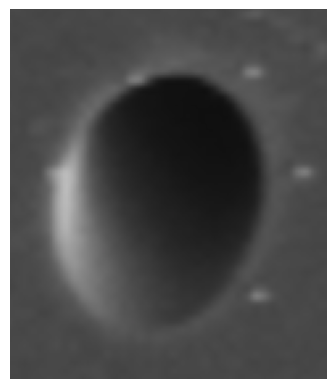

In [2]:

training_image = dt.LoadImage(f"data/loadstar.png")() / 256
if training_image.shape[-1] == 4:
    training_image_rgb = training_image[..., :3]  # Select only the first 3 channels (RGB)

plt.imshow(training_image_rgb)
plt.axis("off")

from deeptrack import Image

# Assuming `training_image` is your numpy array
deeptrack_image = Image(training_image_rgb)  # Wrap the numpy array
print(training_image_rgb.shape)

In [3]:
model = dt.models.LodeSTAR(input_shape=(None, None, 1))

training_pipeline = (
    dt.Value(training_image_rgb)
    >> dt.Multiply(lambda: np.random.uniform(0.9, 1.1))
    >> dt.Add(lambda: np.random.uniform(-0.1, 0.1))
    >> dt.MoveAxis(-1, 0)
    >> dt.pytorch.ToTensor(dtype=torch.float32)
)

training_dataset = dt.pytorch.Dataset(training_pipeline, length=400, 
                                      replace=False)



In [4]:
import deeptrack.deeplay as dl 

dataloader = dl.DataLoader(training_dataset, batch_size=8, shuffle=True)

In [5]:
lodestar = dl.LodeSTAR(n_transforms=4, optimizer=dl.Adam(lr=1e-4)).build()
trainer = dl.Trainer(max_epochs=200)
trainer.fit(lodestar, dataloader)

c:\Users\aksha\anaconda3\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
c:\Users\aksha\anaconda3\lib\site-packages\lightning\pytorch\utilities\model_summary\model_summary.py:454: A layer with UninitializedParameter was found. Thus, the total number of parameters detected may be inaccurate.


┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type                       ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model         │ ConvolutionalNeuralNetwork │  251 K │
│ 1 │ between_loss  │ L1Loss                     │      0 │
│ 2 │ within_loss   │ L1Loss                     │      0 │
│ 3 │ train_metrics │ MetricCollection           │      0 │
│ 4 │ val_metrics   │ MetricCollection           │      0 │
│ 5 │ test_metrics  │ MetricCollection           │      0 │
│ 6 │ optimizer     │ Adam                       │      0 │
└───┴───────────────┴────────────────────────────┴────────┘

Trainable params: 251 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 251 K                                                                                                
Total estimated model params size (MB): 1

c:\Users\aksha\anaconda3\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=19` in the `DataLoader` to improve performance.


Output()

(1103, 1536, 3)
torch.Size([1, 3, 1103, 1536])


C:\Users\aksha\AppData\Local\Temp\ipykernel_14180\3596840908.py:36: RuntimeWarning: invalid value encountered in divide
  plt.scatter(y.flatten(), x.flatten(), alpha=rho.flatten() / rho.max(), s=5)


ValueError: alpha must be between 0 and 1, inclusive, but min is nan, max is nan

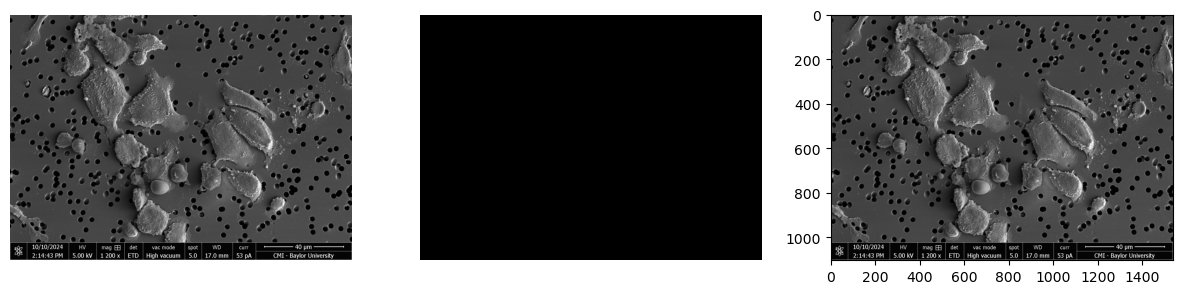

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import PIL

# Load the image using PIL and convert to numpy array
image = np.array(PIL.Image.open("C:/Users/aksha/Peeples_Lab/SEM_Images_Lacunarity/Image_Crop/1200x images/Untreated_TJ_101020204_02.tif"))

print(image.shape)

# Convert the numpy array to a PyTorch tensor (channels first, add batch dimension)
torch_image = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0).float()
print(torch_image.shape)
# Make prediction using the lodestar model
prediction = lodestar(torch_image)[0].detach().numpy()

# Extract x, y, and rho (assumed structure of the prediction)
x, y, rho = prediction[0], prediction[1], prediction[-1]

# Plot the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image[..., :3], cmap="gray")  # Only show the original 3 channels (RGB)
plt.axis("off")

# Plot rho
plt.subplot(1, 3, 2)
plt.imshow(rho, cmap="gray")
plt.axis("off")

# Overlay predicted points on the original image
plt.subplot(1, 3, 3)
plt.imshow(image[..., :3], cmap="gray")  # Show original image
plt.scatter(y.flatten(), x.flatten(), alpha=rho.flatten() / rho.max(), s=5)
plt.axis("off")

plt.show()
